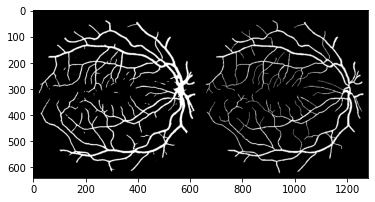

In [114]:
import glob

import cv2
from  matplotlib import pyplot as plt
%matplotlib inline

im = cv2.imread("/home/akiyo/code/Deep_Learning/Project/Segmentation/UNet/test/y_pred_28.png", 1)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()


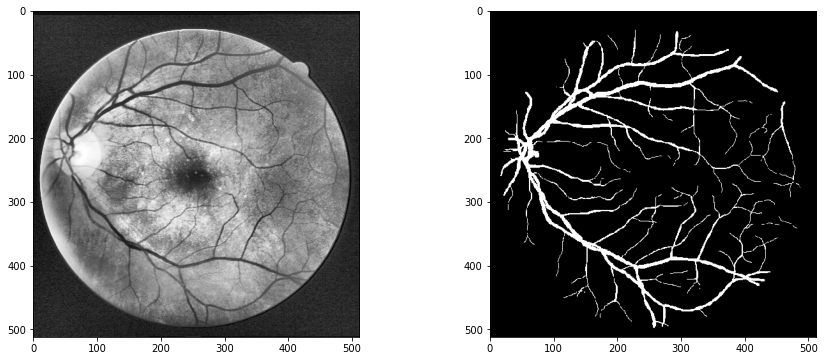

(512, 512, 3) (512, 512)


In [14]:
import os
import random
import numpy as np
from PIL import Image
from albumentations.pytorch import ToTensorV2
import albumentations as A
from  matplotlib import pyplot as plt
import glob
%matplotlib inline

height, width = 512, 512
transform = A.Compose([
    A.Resize(height, width, always_apply=True),
    A.ToGray(p=1),
    A.RandomGamma(p=1, gamma_limit=(30, 100)),
    A.CLAHE(p=1, clip_limit=(10, 50), tile_grid_size=(5, 5)),
    A.HorizontalFlip(p=0.3),
])

dataset_dir = "/mnt/d/Datasets/Retinal_Image_Database/DRIVE"
train_image_list = glob.glob(os.path.join(dataset_dir, 'training', 'images', '*.tif'))
train_groud_list = glob.glob(os.path.join(dataset_dir, 'training', '1st_manual', '*.gif'))
test_image_list = glob.glob(os.path.join(dataset_dir, 'test', 'images', '*.tif'))

dataset2_dir = "/mnt/d/Datasets/Retinal_Image_Database/CHASEDB1"
train_image_list += glob.glob(os.path.join(dataset2_dir, 'training', 'images', '*.jpg'))
train_groud_list += glob.glob(os.path.join(dataset2_dir, 'training', 'mask', '*_1stHO.png'))

dataset4_dir = "/mnt/d/Datasets/Retinal_Image_Database/RITE"
train_image_list += glob.glob(os.path.join(dataset4_dir, 'training', 'images', '*.tif'))
train_groud_list += glob.glob(os.path.join(dataset4_dir, 'training', 'vessel', '*.png'))
train_image_list += glob.glob(os.path.join(dataset4_dir, 'test', 'images', '*.tif'))
train_groud_list += glob.glob(os.path.join(dataset4_dir, 'test', 'vessel', '*.png'))

c = list(zip(train_image_list, train_groud_list))
random.shuffle(c)
train_image_list, train_groud_list = zip(*c)


image = Image.open("/mnt/d/Datasets/Retinal_Image_Database/DRIVE/training/images/21_training.tif");mask = Image.open("/mnt/d/Datasets/Retinal_Image_Database/DRIVE/training/1st_manual/21_manual1.gif")
transformed_image = transform(image=np.asarray(image, dtype=np.uint8), mask=np.asarray(mask, dtype=np.uint8));fig, axes = plt.subplots(1, 2, figsize=(15, 6));axes[0].imshow(transformed_image["image"]);axes[1].imshow(transformed_image["mask"], plt.cm.gray);plt.show();print(transformed_image["image"].shape, transformed_image["mask"].shape)

In [27]:
import os
import glob
import random
from PIL import Image

dataset_dir = "/mnt/d/Datasets/Retinal_Image_Database/DRIVE"
train_image_list = glob.glob(os.path.join(dataset_dir, 'training', 'images', '*.tif'))
train_groud_list = glob.glob(os.path.join(dataset_dir, 'training', '1st_manual', '*.gif'))

dataset2_dir = "/mnt/d/Datasets/Retinal_Image_Database/CHASEDB1"
train_image_list += glob.glob(os.path.join(dataset2_dir, 'training', 'images', '*.jpg'))
train_groud_list += glob.glob(os.path.join(dataset2_dir, 'training', 'mask', '*_1stHO.png'))

dataset4_dir = "/mnt/d/Datasets/Retinal_Image_Database/RITE"
train_image_list += glob.glob(os.path.join(dataset4_dir, 'training', 'images', '*.tif'))
train_groud_list += glob.glob(os.path.join(dataset4_dir, 'training', 'vessel', '*.png'))
train_image_list += glob.glob(os.path.join(dataset4_dir, 'test', 'images', '*.tif'))
train_groud_list += glob.glob(os.path.join(dataset4_dir, 'test', 'vessel', '*.png'))

c = list(zip(train_image_list, train_groud_list))
random.shuffle(c)
train_image_list, train_groud_list = zip(*c)

num = 0

for i, j in zip(train_image_list, train_groud_list):
    image = Image.open(i); mask = Image.open(j)
    transformed_image = transform(image=np.asarray(image, dtype=np.uint8), mask=np.asarray(mask, dtype=np.uint8))
    Image.fromarray(transformed_image["image"]).save(f"/mnt/d/Datasets/Retinal_Image_Database/DataArgument/training/images/{num}.png")
    Image.fromarray(transformed_image["mask"]).save(f"/mnt/d/Datasets/Retinal_Image_Database/DataArgument/training/mask/{num}.png")
    num += 1